In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
file_path_social = '/Users/saiyer33/Downloads/socialmedia.csv'
df_social = pd.read_csv(file_path_social)
file_path_general = '/Users/saiyer33/Downloads/Untitled spreadsheet - General.csv'
df_general = pd.read_csv(file_path_general)
file_path_age = '/Users/saiyer33/Downloads/Untitled spreadsheet - Age.csv'
df_age = pd.read_csv(file_path_age)
file_path_gender = '/Users/saiyer33/Downloads/Untitled spreadsheet - Gender.csv'
df_gender = pd.read_csv(file_path_gender)
file_path_suicide = '/Users/saiyer33/Downloads/Untitled spreadsheet - Suicide.csv'
df_suicide = pd.read_csv(file_path_suicide)
file_path_general_2 = '/Users/saiyer33/Downloads/Untitled spreadsheet - General 2.csv'
df_general_2 = pd.read_csv(file_path_general_2)
print(df_social.head())

            Timestamp  1. What is your age? 2. Gender 3. Relationship Status  \
0  4/18/2022 19:18:47                  21.0      Male      In a relationship   
1  4/18/2022 19:19:28                  21.0    Female                 Single   
2  4/18/2022 19:25:59                  21.0    Female                 Single   
3  4/18/2022 19:29:43                  21.0    Female                 Single   
4  4/18/2022 19:33:31                  21.0    Female                 Single   

  4. Occupation Status 5. What type of organizations are you affiliated with?  \
0   University Student                                         University       
1   University Student                                         University       
2   University Student                                         University       
3   University Student                                         University       
4   University Student                                         University       

  6. Do you use social media?  \

In [21]:
#rename columns for necessary information
df_social.rename(columns = {'1. What is your age?':'Age','2. Gender':'Gender','3. Relationship Status':'Relationship Status',
'4. Occupation Status':'Occupation',
'5. What type of organizations are you affiliated with?':'Affiliations',
'6. Do you use social media?':'Social Media User?',
'7. What social media platforms do you commonly use?':'Platforms Used',
'8. What is the average time you spend on social media every day?':'Hours Per Day',
'9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
'10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
"11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
'12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
'13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
'14. Do you find it difficult to concentrate on things?':'ADHD Q4',
'15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
'16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self Esteem Q2',
'17. How often do you look to seek validation from features of social media?':'Self Esteem Q3',
'18. How often do you feel depressed or down?':'Depression Q1',
'19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
'20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3' },inplace=True)

In [22]:
titles = list(df_social.columns)
titles[11], titles[12] = titles[12], titles[11]
titles[12], titles[14] = titles[14], titles[12]
titles[13], titles[14] = titles[14], titles[13]
data = df_social[titles]
titles

['Timestamp',
 'Age',
 'Gender',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Hours Per Day',
 'ADHD Q1',
 'ADHD Q2',
 'ADHD Q3',
 'ADHD Q4',
 'Anxiety Q1',
 'Anxiety Q2',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [23]:
#Setting scale scores
df_social.loc[df_social['Self Esteem Q2'] == 1, 'Self Esteem Q2'] = 5
df_social.loc[df_social['Self Esteem Q2'] == 2, 'Self Esteem Q2'] = 4
df_social.loc[df_social['Self Esteem Q2'] == 3, 'Self Esteem Q2'] = 3
df_social.loc[df_social['Self Esteem Q2'] == 4, 'Self Esteem Q2'] = 2
df_social.loc[df_social['Self Esteem Q2'] == 5, 'Self Esteem Q2'] = 1

In [26]:
#Sum scores and add new column

ADHD = ['ADHD Q1', 'ADHD Q2', 'ADHD Q3', 'ADHD Q4']
df_social['ADHD Score'] = df_social[ADHD].sum(axis=1)

Anxiety = ['Anxiety Q1', 'Anxiety Q2']
df_social['Anxiety Score'] = df_social[Anxiety].sum(axis=1)

SelfEsteem = ['Self Esteem Q1', 'Self Esteem Q2', 'Self Esteem Q3']
df_social['Self Esteem Score'] = df_social[SelfEsteem].sum(axis=1)

Depression = ['Depression Q1', 'Depression Q2', 'Depression Q3']
df_social['Depression Score'] = df_social[Depression].sum(axis=1)

Total = ['ADHD Score', 'Anxiety Score', 'Self Esteem Score', 'Depression Score']
df_social['Total Score'] = df_social[Total].sum(axis=1)

# Deleting question columns and timestamp columns as they are no longer used
df_social.drop(columns=ADHD + Anxiety + SelfEsteem + Depression, inplace=True)

In [29]:
# Count unique values in the 'Hours Per Day' column
hour_counts = df_social['Hours Per Day'].value_counts()

# Print the counts
print("Counts of Hours Spent Per Day:")
print(hour_counts)

Counts of Hours Spent Per Day:
More than 5 hours        116
Between 2 and 3 hours    101
Between 3 and 4 hours     93
Between 1 and 2 hours     70
Between 4 and 5 hours     67
Less than an Hour         34
Name: Hours Per Day, dtype: int64


In [31]:
#Setting new value labels
df_social.loc[df_social['Hours Per Day'] == 'More than 5 hours', 'Hours Per Day'] = '5.5h'
df_social.loc[df_social['Hours Per Day'] == 'Between 2 and 3 hours', 'Hours Per Day'] = '2.5h'
df_social.loc[df_social['Hours Per Day'] == 'Between 3 and 4 hours', 'Hours Per Day'] = '3.5h'
df_social.loc[df_social['Hours Per Day'] == 'Between 1 and 2 hours', 'Hours Per Day'] = '1.5h'
df_social.loc[df_social['Hours Per Day'] == 'Between 4 and 5 hours', 'Hours Per Day'] = '4.5h'
df_social.loc[df_social['Hours Per Day'] == 'Less than an Hour', 'Hours Per Day'] = '0.5h'

In [32]:
# Calculate mean and standard deviation for each bin
summary_stats = df_social.groupby('Hours Per Day')['Total Score'].agg(['mean', 'std'])

# Display summary statistics
print(summary_stats)

                    mean       std
Hours Per Day                     
0.5h           24.882353  8.322167
1.5h           31.771429  7.890871
2.5h           36.019802  8.435615
3.5h           38.397849  8.353780
4.5h           39.179104  7.438486
5.5h           41.258621  7.576991


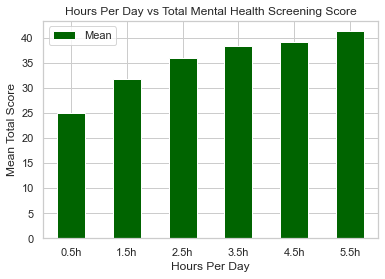

In [33]:
# Calculate mean and standard deviation for each bin
summary_stats = df_social.groupby('Hours Per Day')['Total Score'].agg(['mean'])

# Plot mean total score as bar plot with dark green color
mean_plot = summary_stats['mean'].plot(kind='bar', color='darkgreen', label='Mean')

# Add labels and title
plt.xlabel('Hours Per Day')
plt.ylabel('Mean Total Score')
plt.title('Hours Per Day vs Total Mental Health Screening Score')

plt.xticks(rotation=0)

# Add legend
plt.legend()

# Show plot
plt.show()

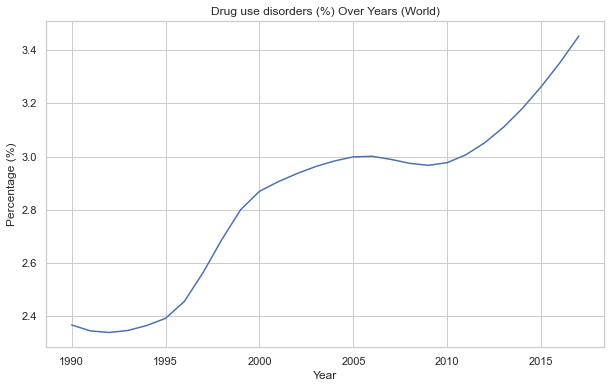

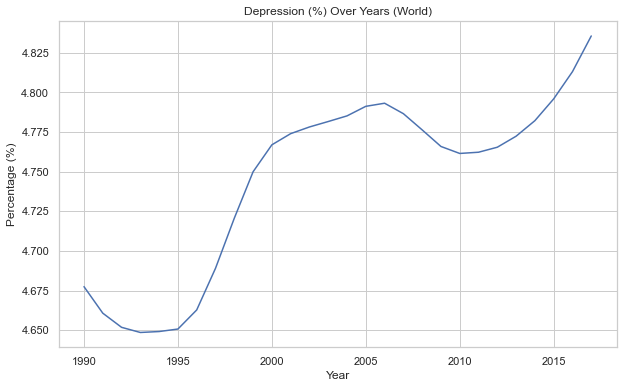

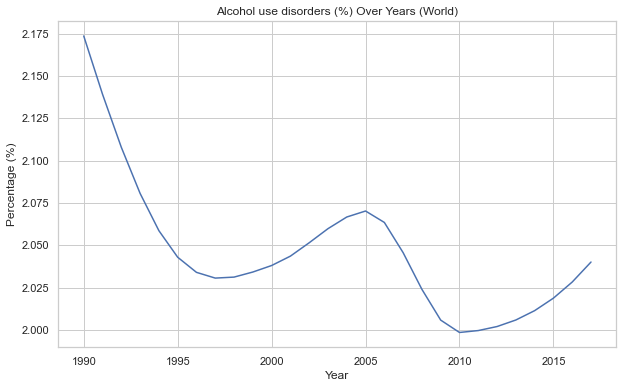

In [12]:
world_df = df_general[df_general['Country Code'] == 'USA']

disorders = ['Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']

# Set the style of the plots
sns.set_theme(style="whitegrid")

# Plot each disorder individually
for disorder in disorders:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=world_df, x='Year', y=disorder)
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.title(f'{disorder} Over Years (World)')
    plt.grid(True)
    plt.show()

In [9]:
# Filter the DataFrame to include only rows where Entity is "World"
world_df = df_general[df_general['Country Code'] == 'USA']

disorders = ['Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']

# Set the style of the plots
correlation = world_df['Depression (%)'].corr(world_df['Drug use disorders (%)'])

print(f"The correlation coefficient between depression rates and drug use rates is: {correlation}")

correlation = world_df['Depression (%)'].corr(world_df['Alcohol use disorders (%)'])

print(f"The correlation coefficient between depression rates and alcohol use rates is: {correlation}")




The correlation coefficient between depression rates and drug use rates is: 0.9652504235710744
The correlation coefficient between depression rates and alcohol use rates is: -0.4829676758084504


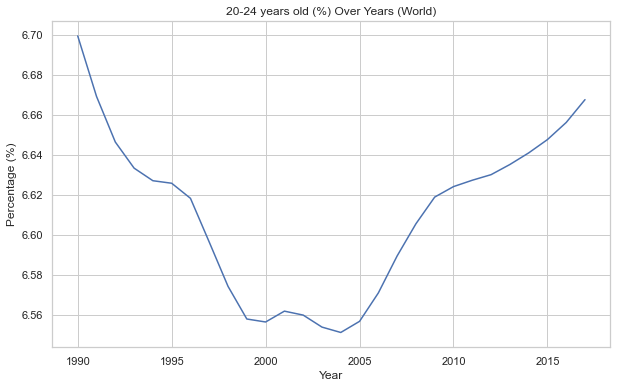

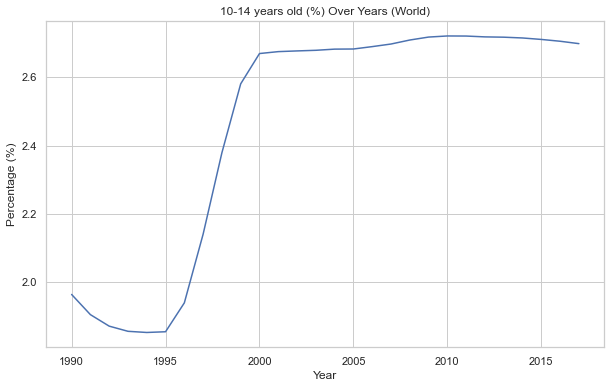

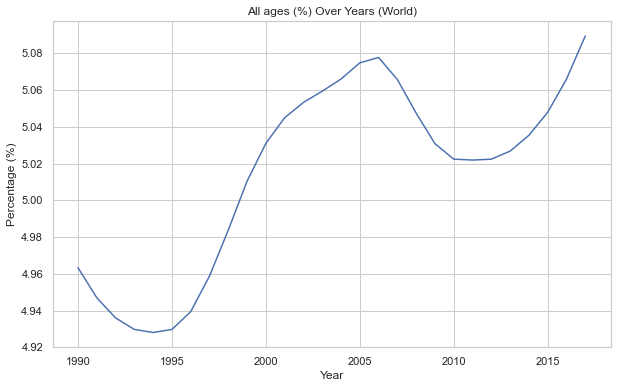

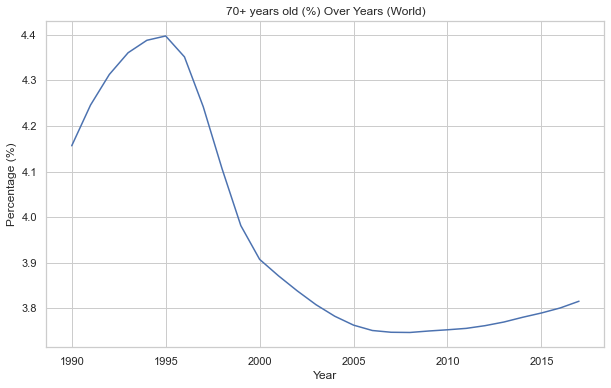

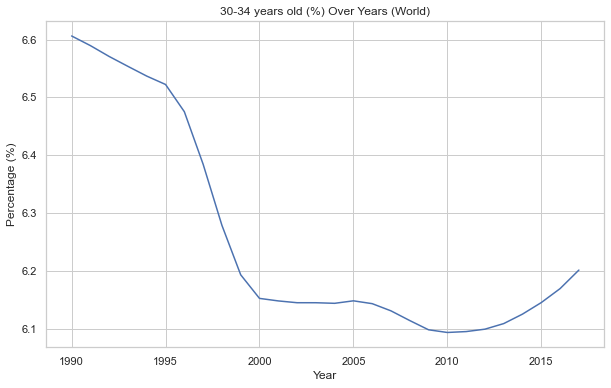

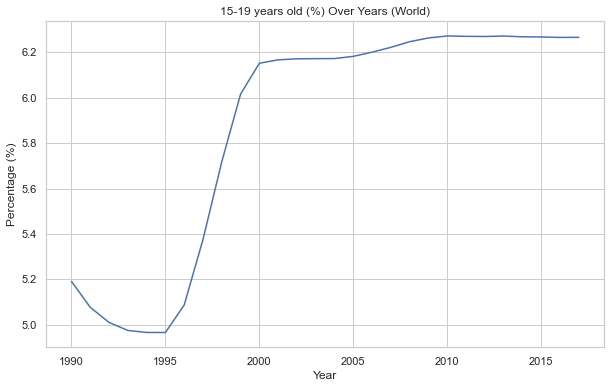

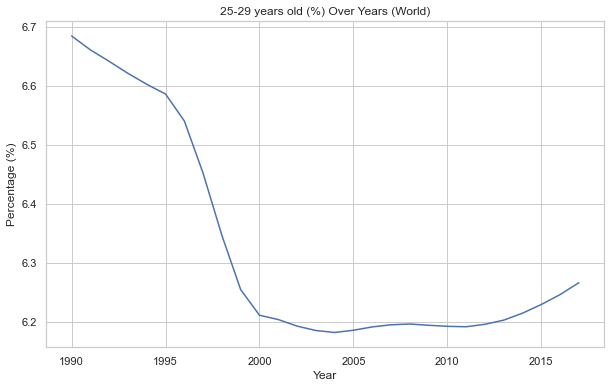

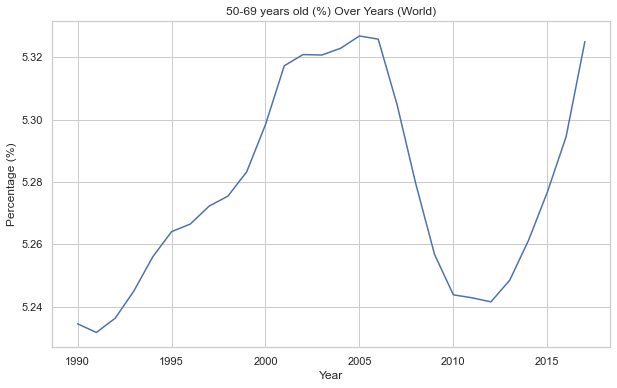

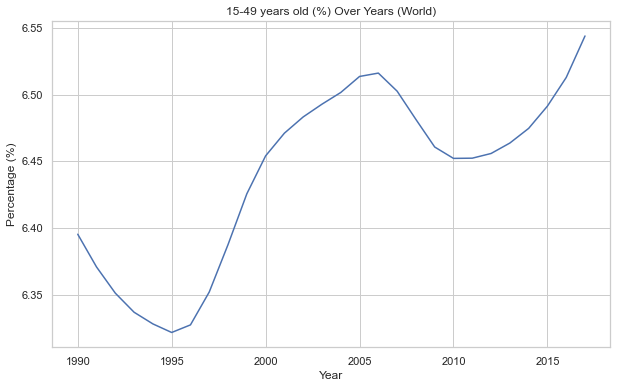

In [30]:
world_df = df_age[df_age['Code'] == 'USA']

ages = ['20-24 years old (%)', '10-14 years old (%)', 'All ages (%)', '70+ years old (%)', '30-34 years old (%)', '15-19 years old (%)', '25-29 years old (%)','50-69 years old (%)','15-49 years old (%)']

# Set the style of the plots
sns.set_theme(style="whitegrid")

# Plot each disorder individually
for age in ages:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=world_df, x='Year', y=age)
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.title(f'{age} Over Years (World)')
    plt.grid(True)
    plt.show()

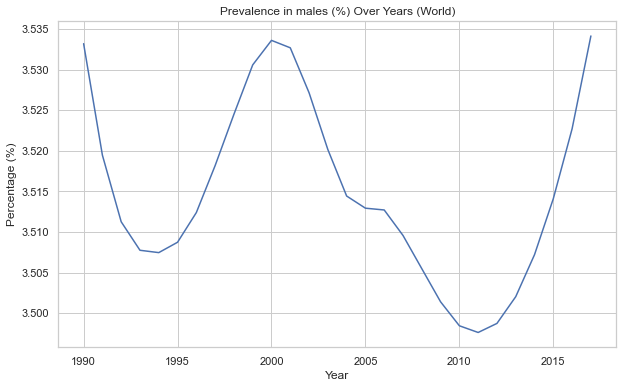

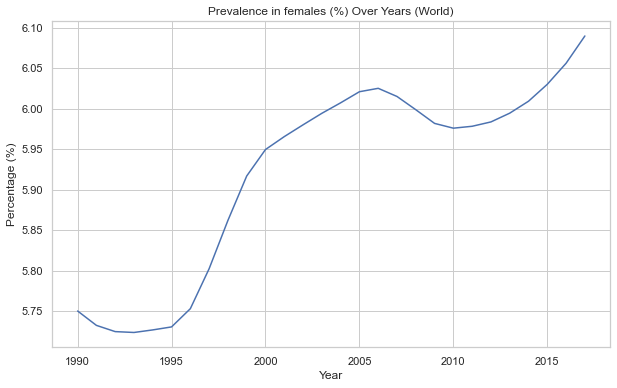

In [32]:
# Filter the DataFrame to include only rows where Entity is "World"
world_df = df_gender[df_gender['Code'] == 'USA']

genders = ['Prevalence in males (%)', 'Prevalence in females (%)']

# Set the style of the plots
sns.set_theme(style="whitegrid")

# Plot each disorder individually
for gender in genders:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=world_df, x='Year', y=gender)
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.title(f'{gender} Over Years (World)')
    plt.grid(True)
    plt.show()

In [40]:
file_path_obese = '/Users/saiyer33/Downloads/Prevalence_of_Selected_Measures_Among_Adults_Aged_20_and_Over__United_States__1999-2000_through_2017-2018 - Sheet1.csv'
df_obese = pd.read_csv(file_path_obese)
print(df_obese.head(90))

   Survey Years  Year   Sex    Age Group                 Measure  Percent
0     1999-2000  1999   All  20 and over  High Total Cholesterol     18.3
1     2001-2002  2001   All  20 and over  High Total Cholesterol     16.5
2     2003-2004  2003   All  20 and over  High Total Cholesterol     16.8
3     2005-2006  2005   All  20 and over  High Total Cholesterol     15.7
4     2007-2008  2007   All  20 and over  High Total Cholesterol     14.3
..          ...   ...   ...          ...                     ...      ...
85    2009-2010  2009  Male  20 and over                 Obesity     35.5
86    2011-2012  2011  Male  20 and over                 Obesity     33.5
87    2013-2014  2013  Male  20 and over                 Obesity     35.0
88    2015-2016  2015  Male  20 and over                 Obesity     37.9
89    2017-2018  2017  Male  20 and over                 Obesity     43.0

[90 rows x 6 columns]


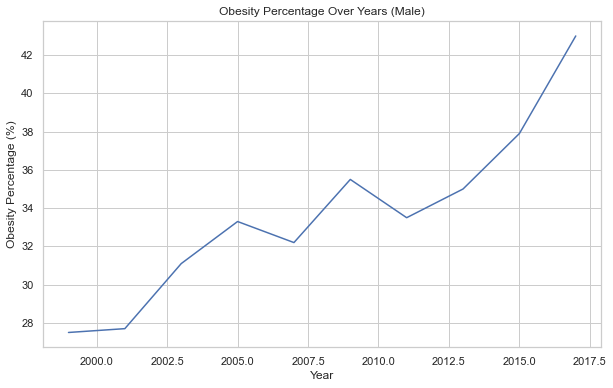

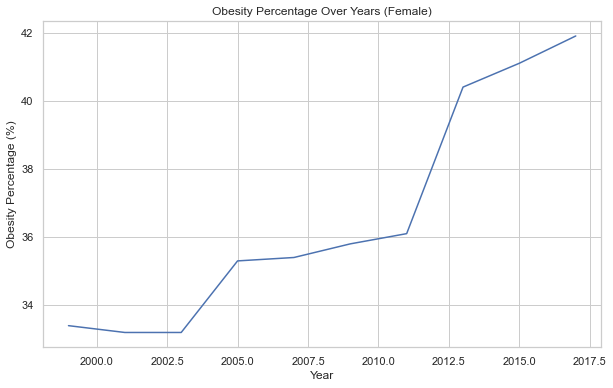

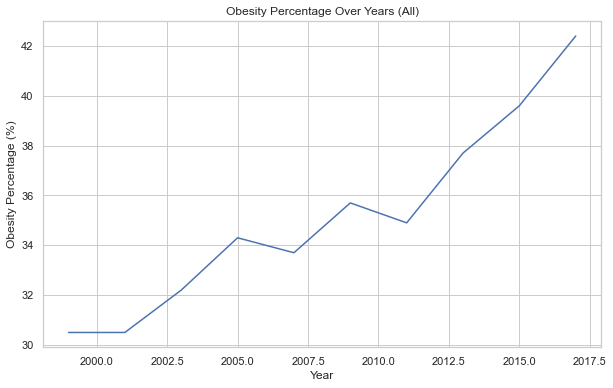

In [47]:
obesity_df = df_obese[df_obese['Measure'] == 'Obesity']

# Set the style of the plots
sns.set_theme(style="whitegrid")

# Function to plot data
def plot_obesity(data, gender):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='Year', y='Percent',markers=True)
    plt.xlabel('Year')
    plt.ylabel('Obesity Percentage (%)')
    plt.title(f'Obesity Percentage Over Years ({gender})')
    plt.grid(True)
    plt.show()

# Plot for males
male_df = obesity_df[obesity_df['Sex'] == 'Male']
plot_obesity(male_df, 'Male')

# Plot for females
female_df = obesity_df[obesity_df['Sex'] == 'Female']
plot_obesity(female_df, 'Female')

# Plot for all
all_df = obesity_df[obesity_df['Sex'] == 'All']
plot_obesity(all_df, 'All')